# Numerical Comparisons

This page contains information to reproduce the numerical comparisons made in SuSiE manuscript. 

Note that the DSC benchmark has to be completed at this stage. 
Please [follow these instructions](../DSC.html) to run the DSC benchmark for SuSiE fine-mapping applications.

In [1]:
%revisions -s --tags --no-walk

Revision,Author,Date,Message
afc0677,Gao Wang,2018-10-10,SuSiE v0.4 results
25944c8,Gao Wang,2018-08-21,SuSiE v0.3 results


The work directory on my computer is `~/GIT/github/mvarbvs/dsc/`. I will navigate to that directory to perform analysis and show the results.

In [2]:
%cd ~/GIT/github/mvarbvs/dsc

/project/mstephens/SuSiE/mvarbvs/dsc

## PIP calibration

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb cali_pip
sos run analysis/20180527_PIP_Workflow.ipynb cali_pip --susie-prior 0
```

### Result

%preview susie_comparison/PIP_comparison_1008_calibrated_prior_0p1_null_0p0.png

> susie_comparison/PIP_comparison_1008_calibrated_prior_0p1_null_0p0.png (38.5 KiB):

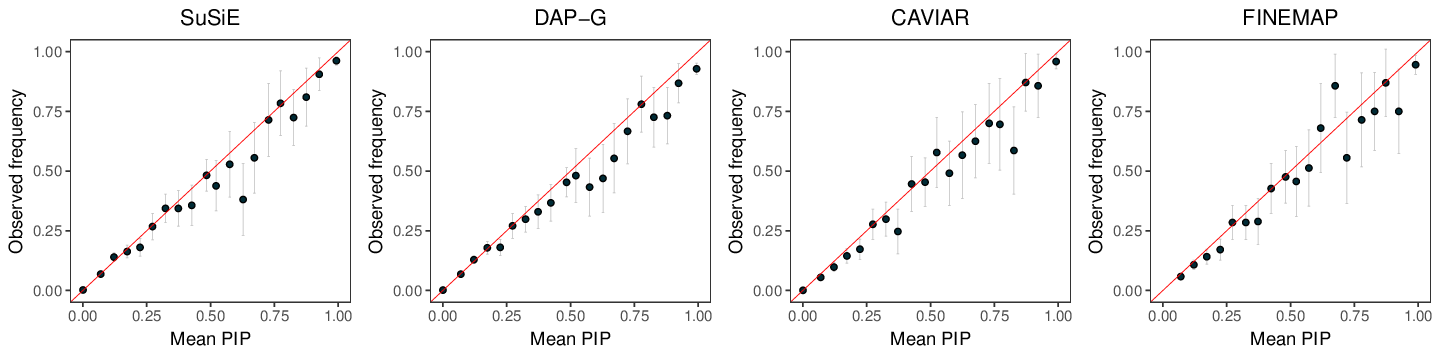

In [3]:
%preview susie_comparison/PIP_comparison_1008_calibrated_prior_0p1_null_0p0.png

%preview susie_comparison/PIP_comparison_1008_calibrated_prior_0p1_null_0p5.png

> susie_comparison/PIP_comparison_1008_calibrated_prior_0p1_null_0p5.png (38.3 KiB):

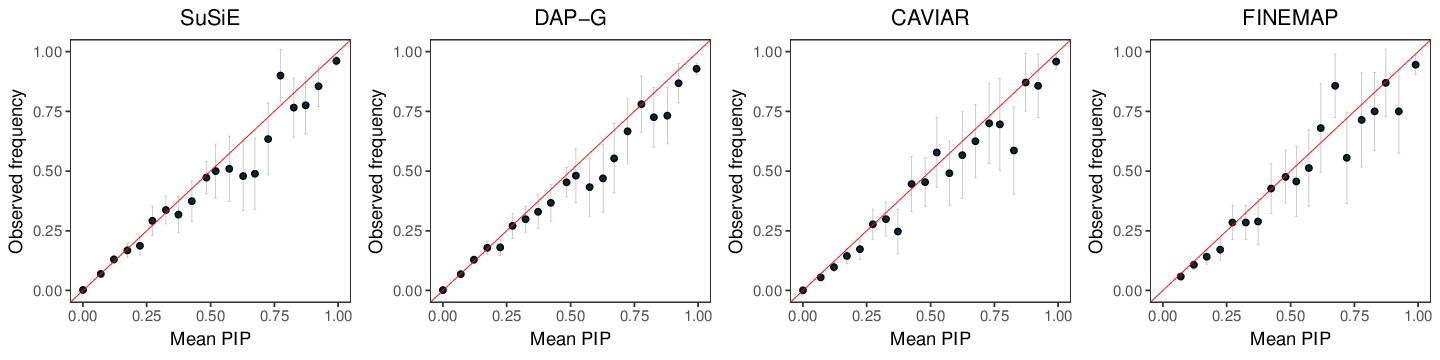

In [4]:
%preview susie_comparison/PIP_comparison_1008_calibrated_prior_0p1_null_0p5.png

## Variable level power comparison

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb roc --null-weight 0.0 0.5
sos run analysis/20180527_PIP_Workflow.ipynb roc --null-weight 0.0 0.5 --susie-prior 0
```

### Result

%preview susie_comparison/ROC_1008_prior_0p1.png

> susie_comparison/ROC_1008_prior_0p1.png (45.1 KiB):

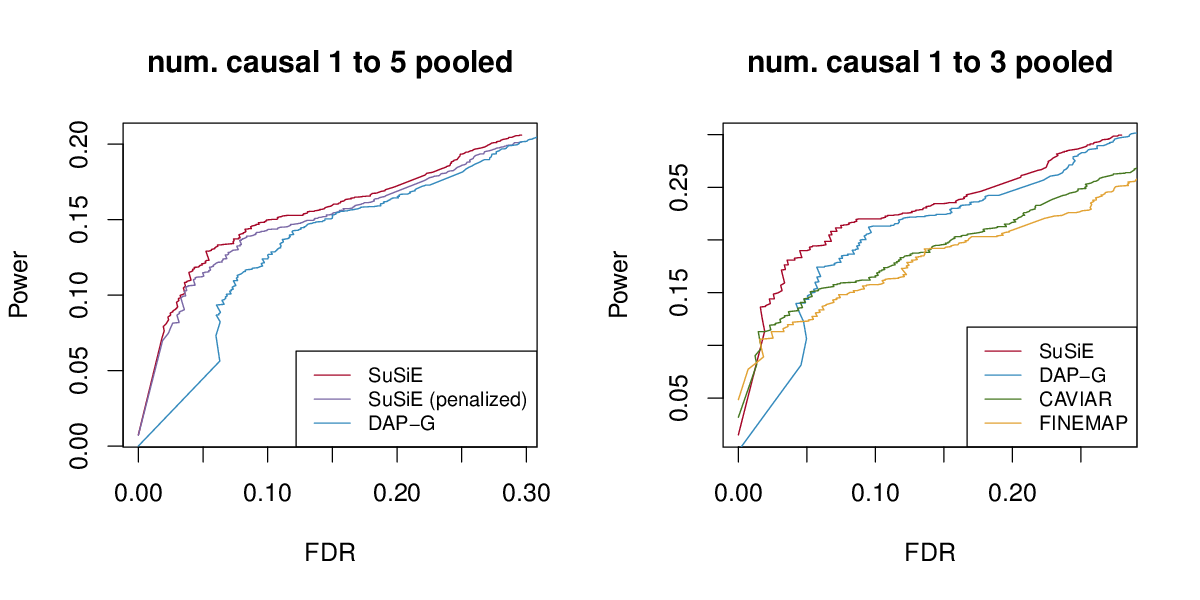

In [5]:
%preview susie_comparison/ROC_1008_prior_0p1.png

## "Purity" distribution

### Command

```
sos run analysis/20180620_Purity_Plot_Lite.ipynb purity
sos run analysis/20180620_Purity_Plot_Lite.ipynb purity \
    --outdir hard_case --name 1008_L10 --source full_data --dataset lm_less03 \
    --susie fit_susie10 --L 10 --pve 0.3 --maxL 15
```

### Result

%preview susie_comparison/hist_1008.png

> susie_comparison/hist_1008.png (10.7 KiB):

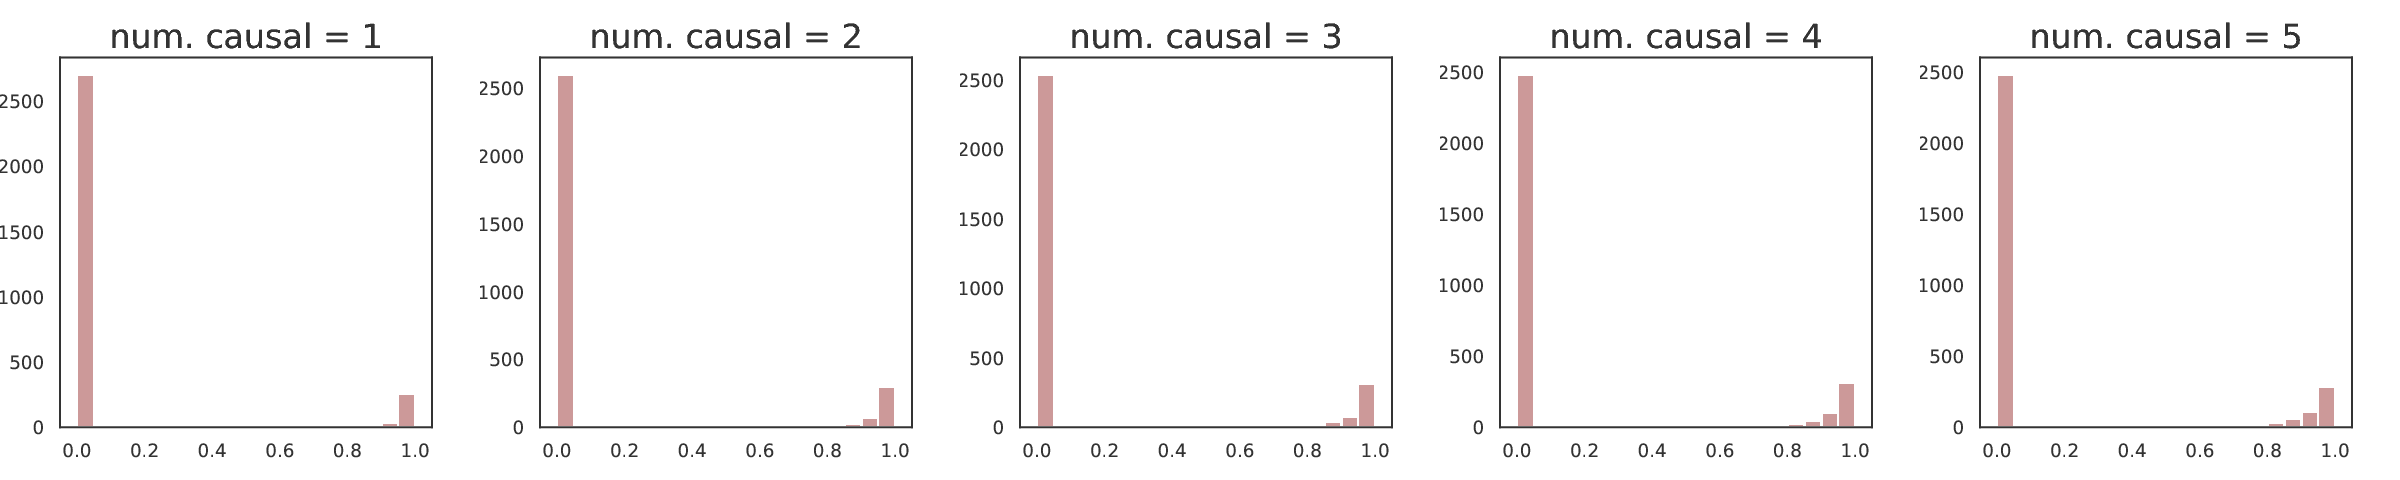

In [6]:
%preview susie_comparison/hist_1008.png

%preview hard_case/hist_1008_L10.png

> hard_case/hist_1008_L10.png (4.3 KiB):

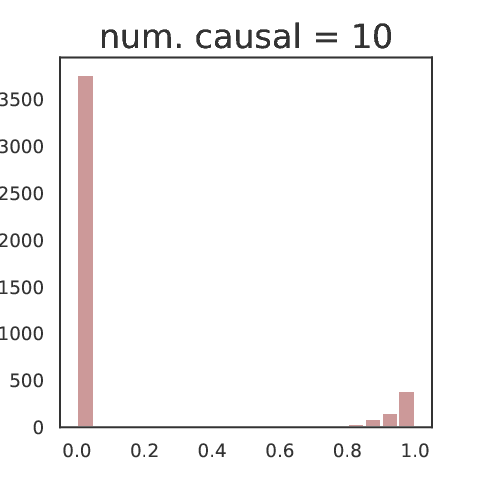

In [7]:
%preview hard_case/hist_1008_L10.png

## Purity vs size illustration

%preview susie_comparison/purity_1007/37.png

> susie_comparison/purity_1007/37.png (338.9 KiB):

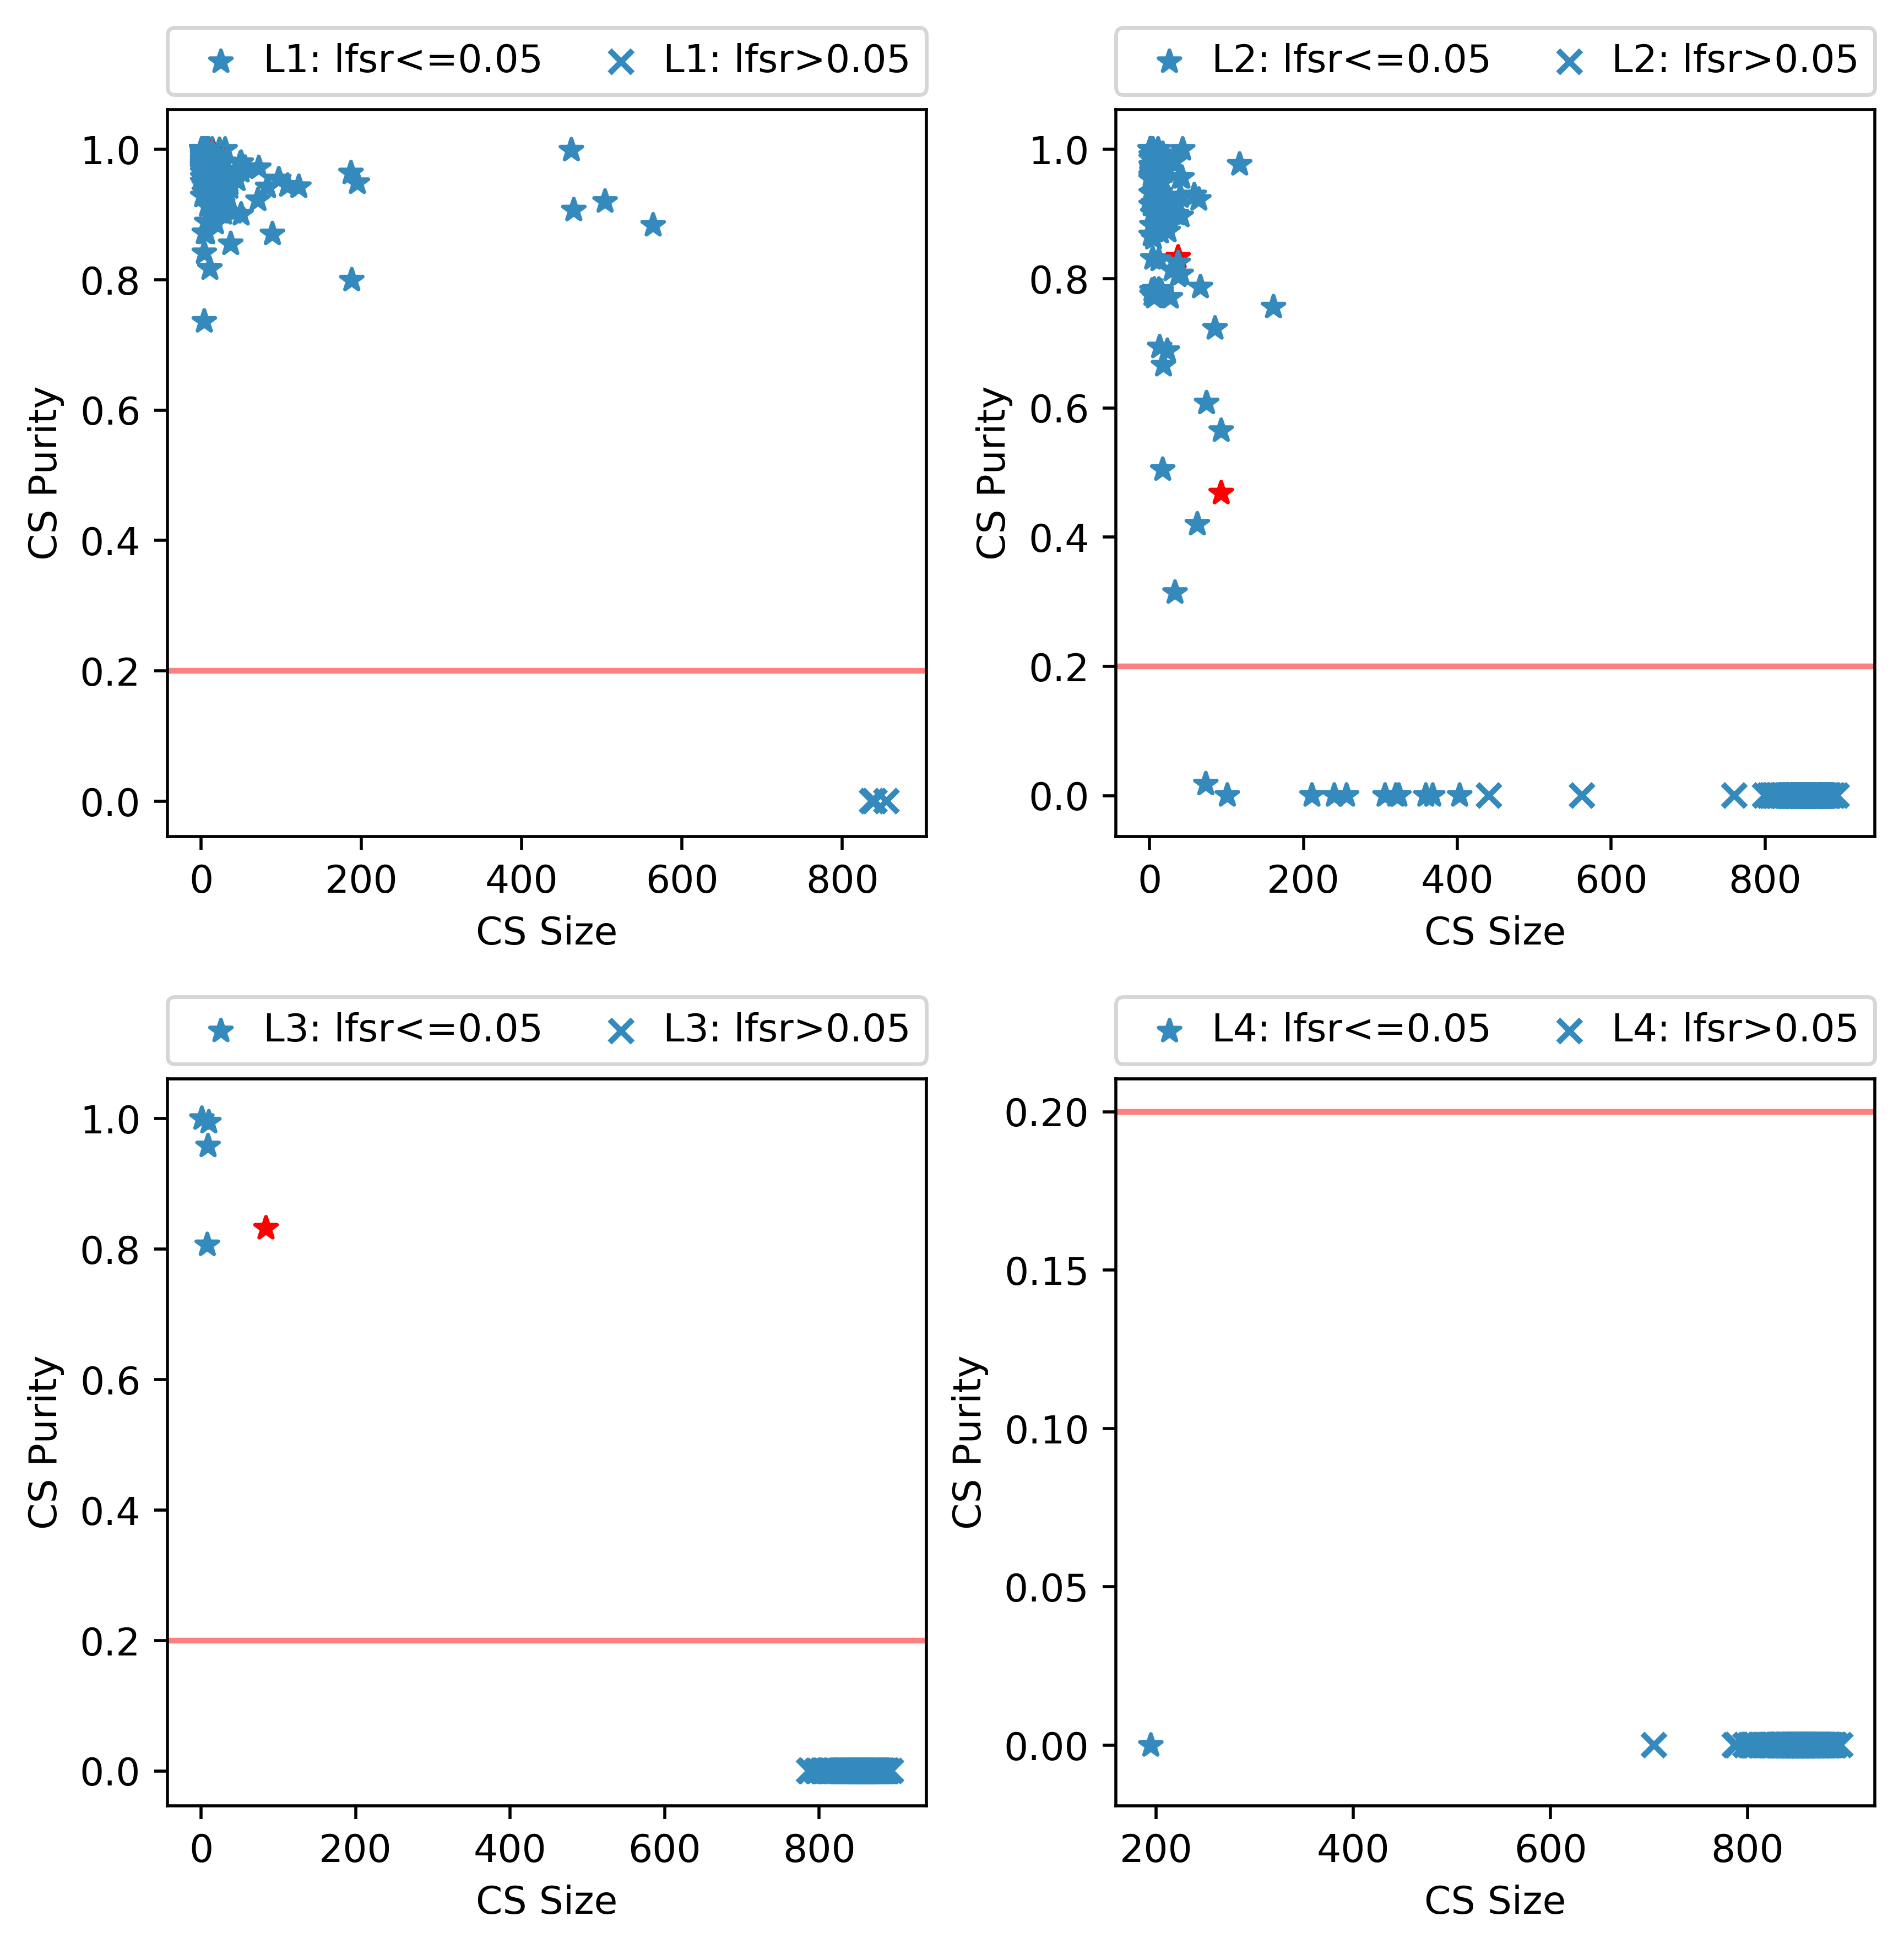

In [8]:
%preview susie_comparison/purity_1007/37.png

## Power comparisons of confidence sets

For "simple case" simulation, number of causal is 1~5 out of 1000 non-causal variants; for the "hard case" number of causal is 10 out of 3000~8000 non-causal variants.

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb power
sos run analysis/20180615_Power_DAP.ipynb power
sos run analysis/20180527_PIP_Workflow.ipynb power --susie-prior 0
sos run analysis/20180615_Power_DAP.ipynb power --susie-prior 0
```

### Result

```
for i in 0.0 0.1; do
    for j in 0.0 0.5 0.9 0.95; do
        sos run ~/GIT/github/susie-paper/manuscript_results/numerical_results.ipynb cs_eval \
        --null-weight $j --susie-prior $i -s force
    done
done
```

In [9]:
readRDS('susie_comparison/Power_comparison_1008_cluster_prob_prior_0p1_null_0p0.rds')

n_signal,expected_discoveries,susie_discoveries,dap_discoveries,susie_power,dap_power,susie_coverage,dap_coverage,susie_avg_size,dap_avg_size,susie_median_size,dap_median_size,susie_avg_ld,dap_avg_ld
1,300,302,270,0.9866667,0.8866667,0.9801325,0.9851852,11.44257,6.056391,3,3,0.9937229,0.9882739
2,600,423,391,0.6716667,0.6016667,0.9503546,0.9181586,18.62189,8.105850,4,5,0.9863083,0.9712244
3,900,493,468,0.5222222,0.4866667,0.9290061,0.9123932,18.05022,10.435597,6,7,0.9807993,0.9607073
4,1200,568,530,0.4516667,0.4033333,0.9207746,0.8943396,17.86424,11.149789,6,8,0.9786782,0.9485908
5,1500,569,533,0.3653333,0.3233333,0.9033392,0.8724203,22.06809,12.324731,7,9,0.9748869,0.9503371


In [10]:
readRDS('hard_case/Power_comparison_1008_cluster_prob_prior_0p1_null_0p0.rds')

,n_signal,expected_discoveries,susie_discoveries,dap_discoveries,susie_power,dap_power,susie_coverage,dap_coverage,susie_avg_size,dap_avg_size,susie_median_size,dap_median_size,susie_avg_ld,dap_avg_ld
10,10,3000,840,801,0.2633333,0.2323333,0.9166667,0.8614232,27.38052,12.5913,9,10,0.9728016,0.9451048


In [ ]:
[global]
def fmtP(x):
    return str(x).replace(".", "p")
date = '1008'
parameter: susie_prior = 0.0
parameter: null_weight = 0.0
parameter: cwd = path('~/GIT/github/mvarbvs/dsc')

[cs_eval_1]
quantities = [('power', 'power'), ('coverage', '95% CS coverage'), ('median_size', 'median size'), ('avg_ld', 'average r2')]
input: for_each = ['quantities'], concurrent = True
output: f'{cwd:a}/susie_comparison/cs_eval/{_quantities[0]}_prior_{fmtP(susie_prior)}_null_{fmtP(null_weight)}.png'
R: expand = "${ }", workdir = cwd, stderr = False, stdout = False
    setting = "prior_${fmtP(susie_prior)}_null_${fmtP(null_weight)}"
    d1 = readRDS(paste0('susie_comparison/Power_comparison_${date}_cluster_prob_', setting, '.rds'))
    d2 = readRDS(paste0('hard_case/Power_comparison_${date}_cluster_prob_', setting, '.rds'))
    dat = rbind(d1,d2)
    print(head(dat))
    dat$susie_power_se = sqrt(dat$susie_power * (1-dat$susie_power) / dat$expected_discoveries)
    dat$dap_power_se = sqrt(dat$dap_power * (1-dat$dap_power) / dat$expected_discoveries)
    dat$susie_coverage_se = sqrt(dat$susie_coverage * (1-dat$susie_coverage) / dat$susie_discoveries)
    dat$dap_coverage_se = sqrt(dat$dap_coverage * (1-dat$dap_coverage) / dat$dap_discoveries)
    susie = cbind(dat[,c("n_signal", "expected_discoveries", "susie_power", "susie_coverage", "susie_power_se", "susie_coverage_se", "susie_median_size", "susie_avg_ld")], "SuSiE")
    colnames(susie) = c("n_signal", "expected_discoveries", "power", "coverage", "power_se", "coverage_se", "median_size", "avg_ld", "Method")
    dap = cbind(dat[,c("n_signal", "expected_discoveries", "dap_power", "dap_coverage", "dap_power_se", "dap_coverage_se", "dap_median_size", "dap_avg_ld")], "DAP-G")
    colnames(dap) = c("n_signal", "expected_discoveries", "power", "coverage", "power_se", "coverage_se", "median_size", "avg_ld", "Method")
    dat = rbind(susie, dap)
    dat$n_signal = as.factor(dat$n_signal)
    library(ggplot2)
    pdf('${_output:n}.pdf', width=3.5, height=3, pointsize=5)
    p <- ggplot(dat, aes(x=n_signal, y=${_quantities[0]}, fill=Method)) + 
        geom_bar(stat="identity", position=position_dodge()) +
        ${("geom_errorbar(aes(ymin=%s-%s_se, ymax=%s+%s_se), width=.2, position=position_dodge(.9)) +" % ((_quantities[0],) * 4)) if _quantities[0] in ["power", "coverage"] else ""}
        ${"geom_hline(yintercept = 0.95, colour = 'gray') +" if _quantities[0] == "coverage" else ""}
        scale_fill_manual("Method", values = c("DAP-G" = "#348ABD", "SuSiE" = "#A60628")) + 
        labs(x = "num. causal", y = "${_quantities[1]}") + 
        theme_minimal()
    print(p)
    dev.off()
    system("convert -density 120 ${_output:n}.pdf ${_output:n}.png")

[cs_eval_2]
output: f'{cwd:a}/susie_comparison/cs_eval/cs_comparison_prior_{fmtP(susie_prior)}_null_{fmtP(null_weight)}.png'
bash: expand = True, workdir = cwd 
    convert \( {_input[1]} {_input[0]} +append \) \
    \( {_input[2]} {_input[3]} +append \) -append {_output}

%preview susie_comparison/cs_eval/cs_comparison_prior_0p1_null_0p0.png

> susie_comparison/cs_eval/cs_comparison_prior_0p1_null_0p0.png (15.0 KiB):

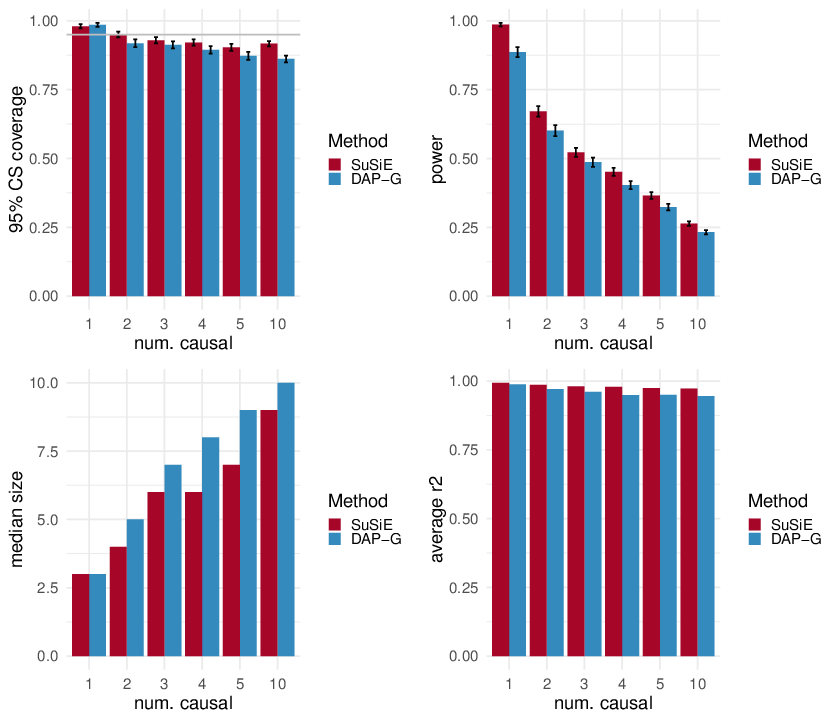

In [12]:
%preview susie_comparison/cs_eval/cs_comparison_prior_0p1_null_0p0.png

## PIP direct comparison

### Command

```
sos run analysis/20180527_PIP_Workflow.ipynb pip
sos run analysis/20180527_PIP_Workflow.ipynb pip --susie-prior 0
```

### Result

SuSiE vs DAP-G

%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_dap.png

> susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_dap.png (92.6 KiB):

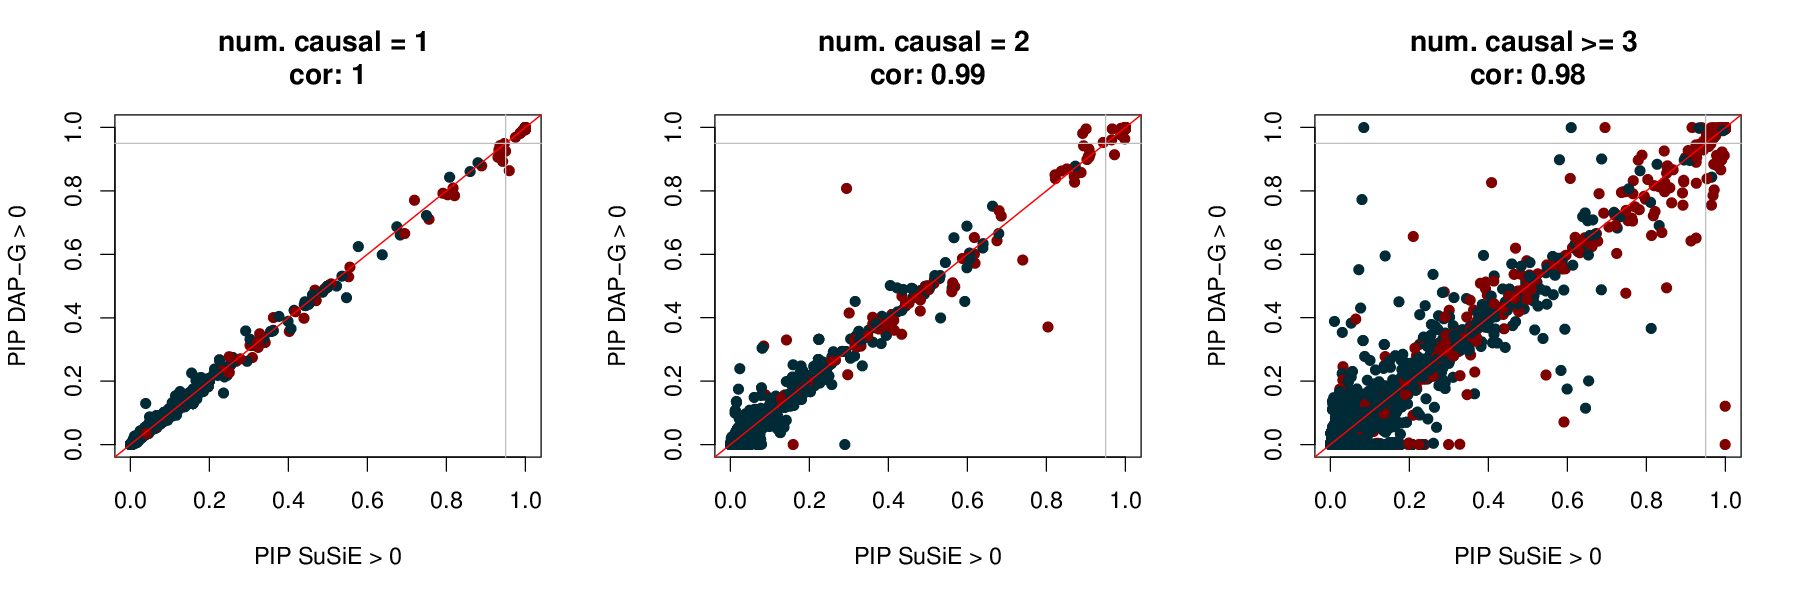

In [13]:
%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_dap.png

%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p5.susie_vs_dap.png

> susie_comparison/PIP_comparison_1008_prior_0p1_null_0p5.susie_vs_dap.png (83.9 KiB):

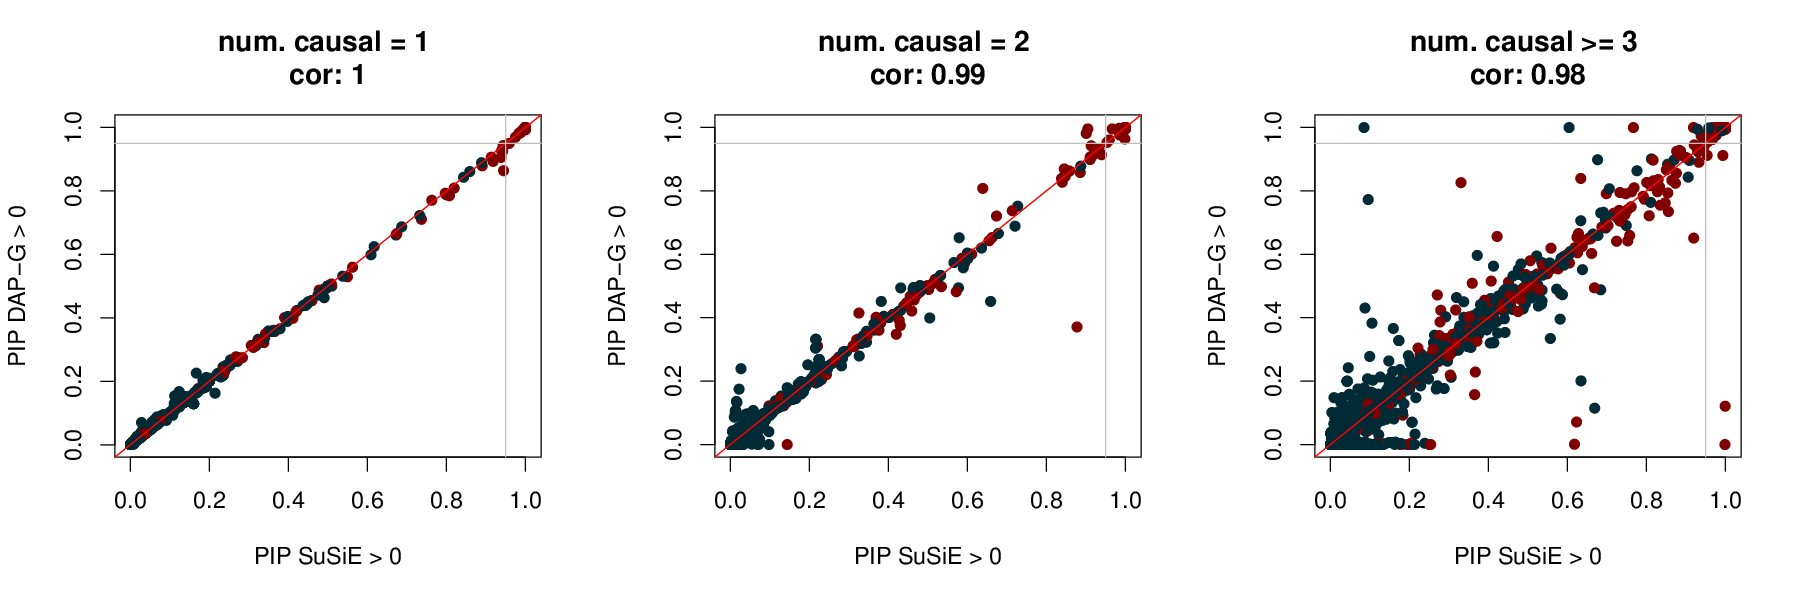

In [14]:
%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p5.susie_vs_dap.png

SuSiE vs CAVIAR

%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_caviar.png

> susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_caviar.png (99.0 KiB):

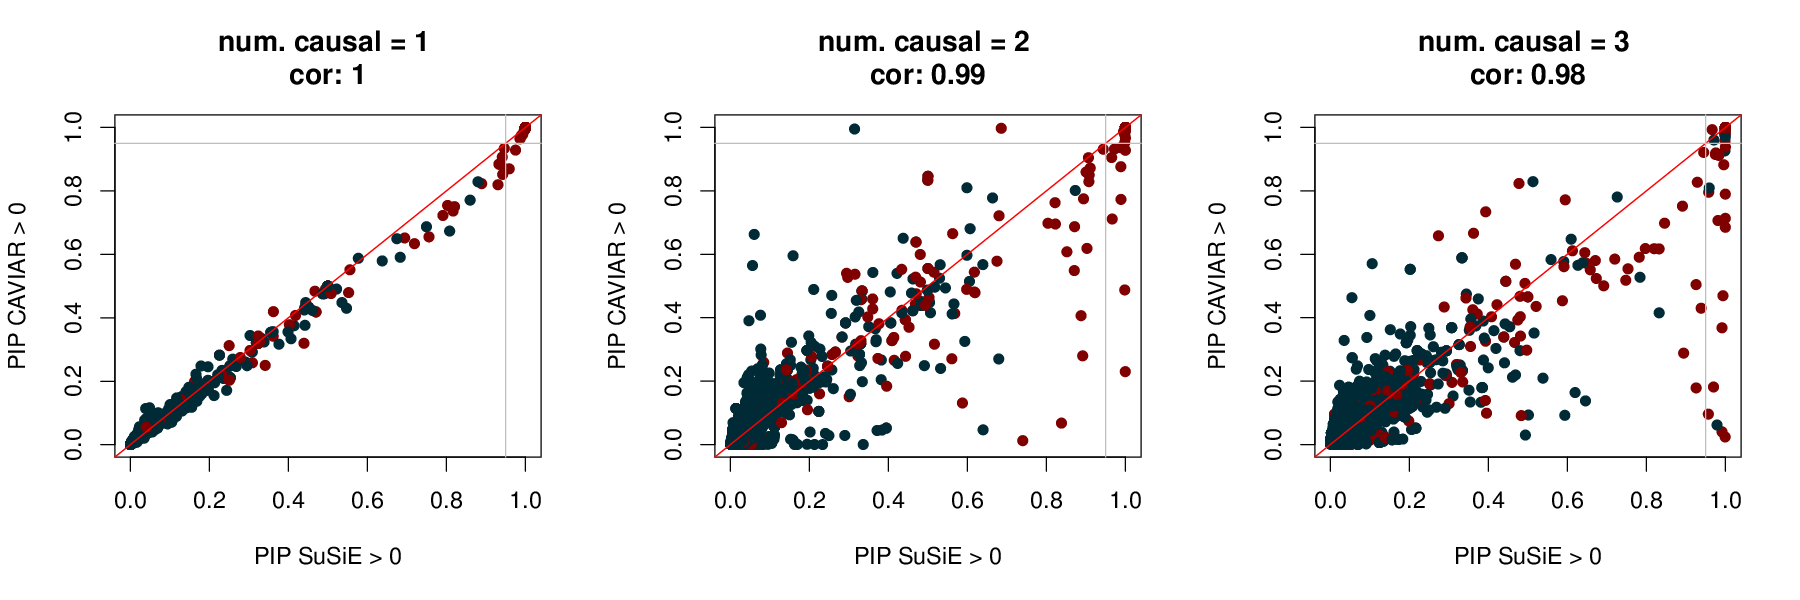

In [15]:
%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_caviar.png

SuSiE vs FINEMAP

%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_finemap.png

> susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_finemap.png (95.3 KiB):

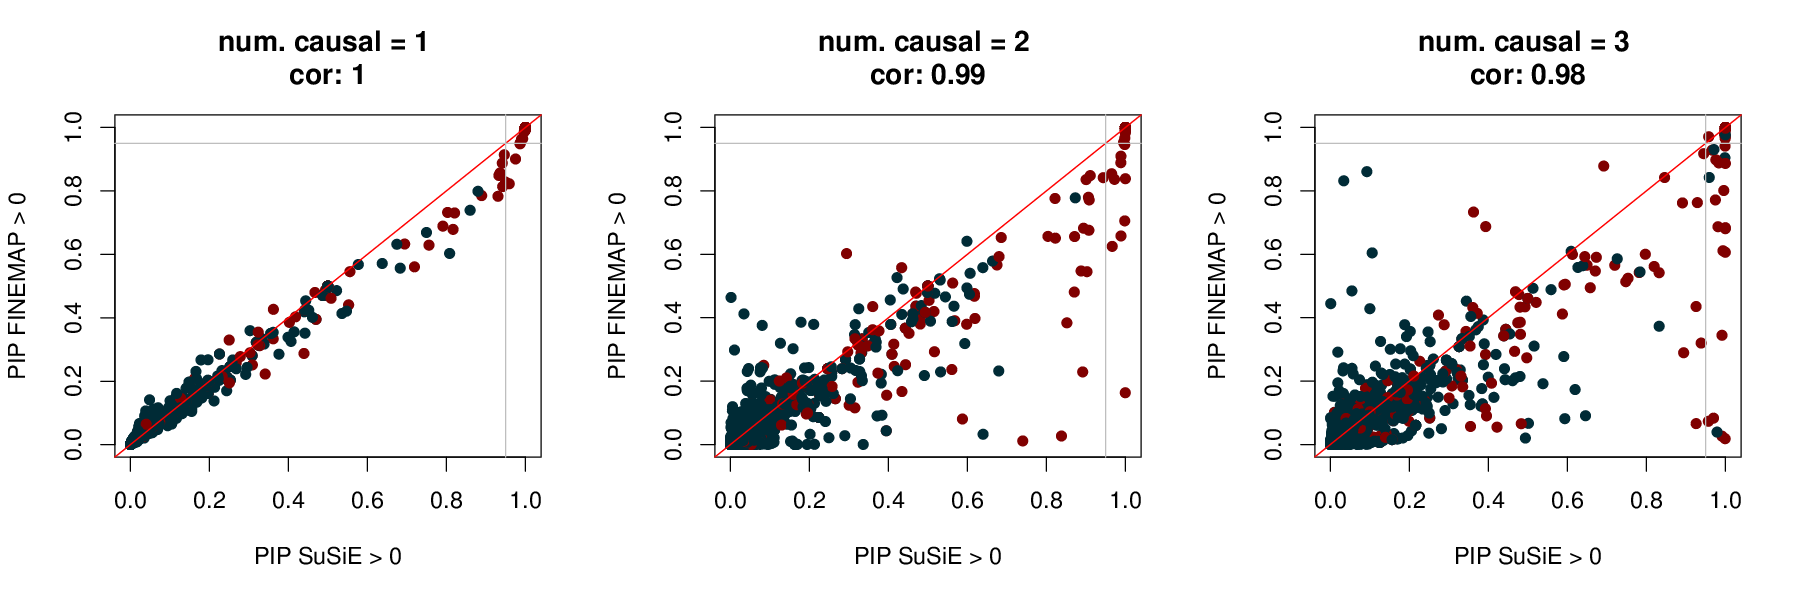

In [16]:
%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.susie_vs_finemap.png

DAP vs CAVIAR

%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.dap_vs_caviar.png

> susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.dap_vs_caviar.png (96.4 KiB):

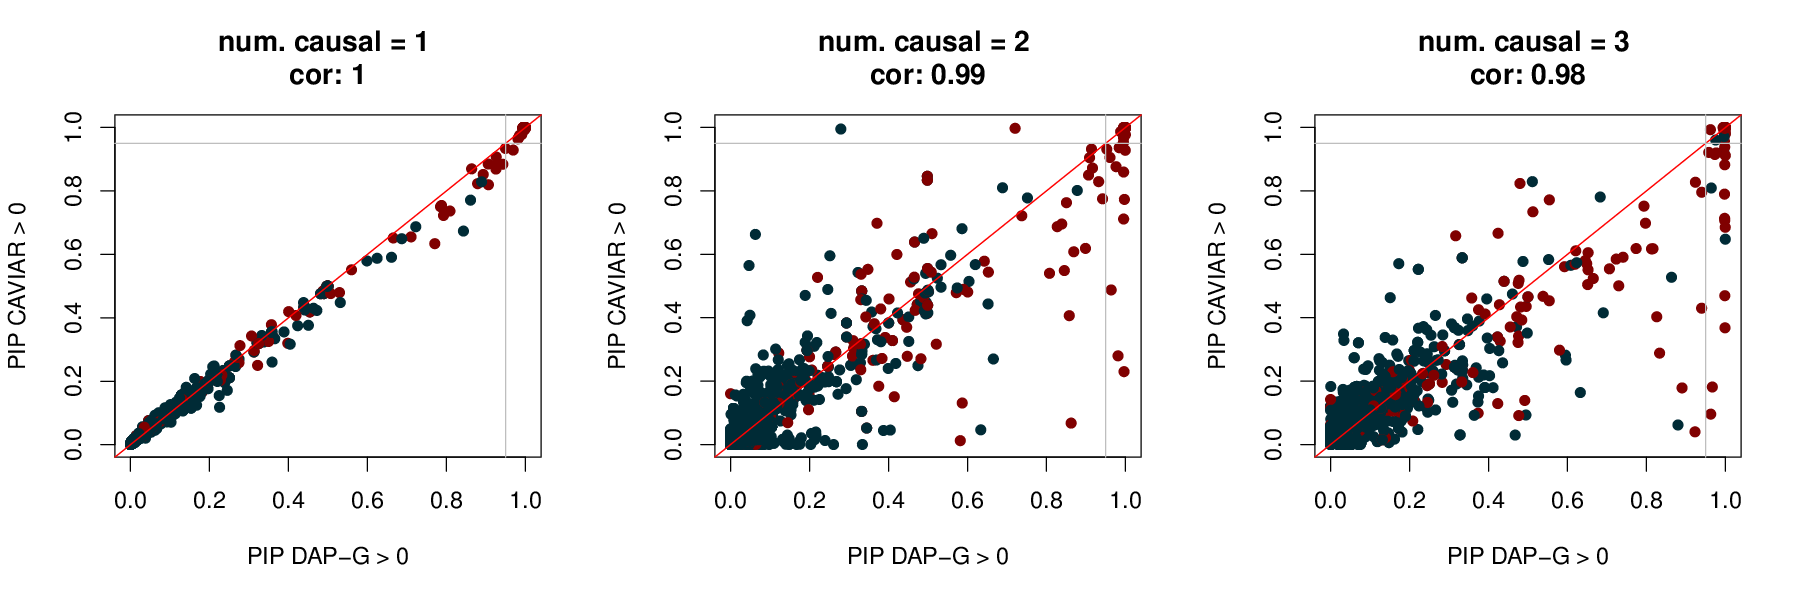

In [17]:
%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.dap_vs_caviar.png

DAP vs FINEMAP

%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.dap_vs_finemap.png

> susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.dap_vs_finemap.png (94.1 KiB):

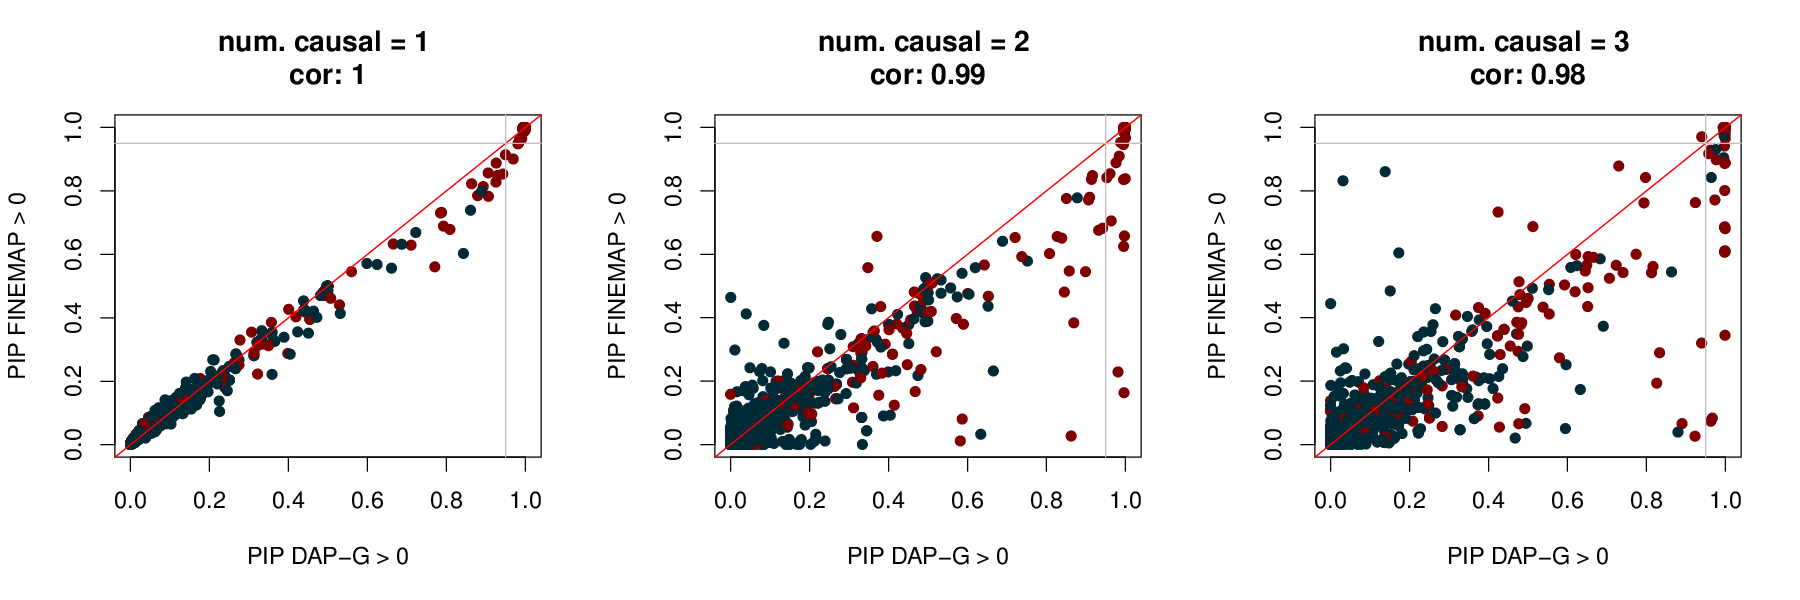

In [18]:
%preview susie_comparison/PIP_comparison_1008_prior_0p1_null_0p0.dap_vs_finemap.png

To consolidate these figures:

In [ ]:
d=1008
convert -append PIP_comparison_"$d"_estvar_true_filter_true_0p5.susie_vs_dap.png PIP_comparison_"$d"_estvar_true_filter_true_0p5.susie_vs_caviar.png PIP_comparison_"$d"_estvar_true_filter_true_0p5.susie_vs_finemap.png PIP_comparison_"$d"_susie_vs_others.png
convert -append PIP_comparison_"$d"_estvar_true_filter_true_0p5.dap_vs_caviar.png PIP_comparison_"$d"_estvar_true_filter_true_0p5.dap_vs_finemap.png PIP_comparison_"$d"_estvar_true_filter_true_0p5.caviar_vs_finemap.png PIP_comparison_"$d"_others.png

## Robustness of purity threshold

### Command

```
sos run analysis/20180620_Purity_Plot_Lite.ipynb ld --L 1
```

### Result

%preview susie_comparison/ld_0722.png

> susie_comparison/ld_0722.png (25.6 KiB):

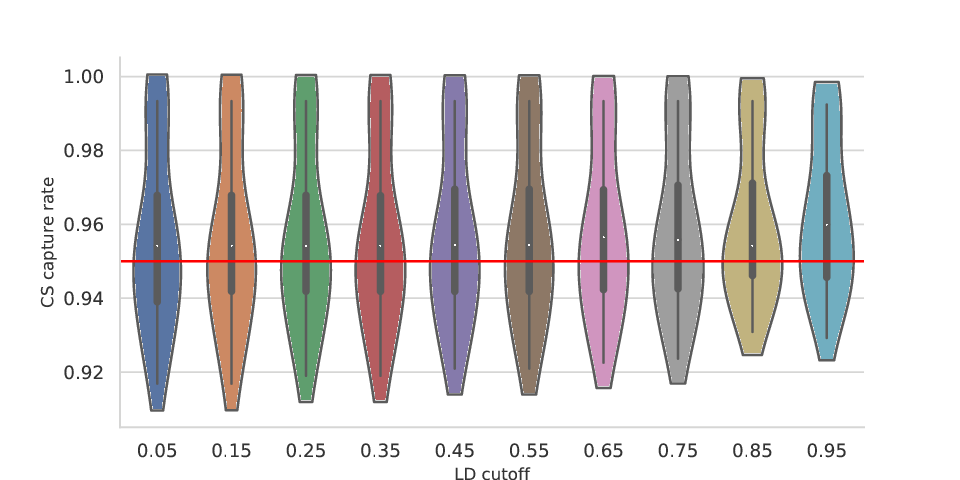

In [19]:
%preview susie_comparison/ld_0722.png

## Reliability of coverage

### Command

Here the strongest null penalty 0.95 is evaluated.

```
sos run analysis/20180527_PIP_Workflow.ipynb coverage --n-signals 3
sos run analysis/20180527_PIP_Workflow.ipynb coverage --n-signals 4
sos run analysis/20180527_PIP_Workflow.ipynb coverage --n-signals 5
```

In [20]:
convert +append susie_comparison/Coverage_1008_prior_0p1_signals_3.png susie_comparison/Coverage_1008_prior_0p1_signals_4.png susie_comparison/Coverage_1008_prior_0p1_signals_5.png susie_comparison/Coverage_1008_prior_0p1.png

### Result

It does not seem the null penalty has helped much with CS coverage, if at all.

%preview susie_comparison/Coverage_1008_prior_0p1.png

> susie_comparison/Coverage_1008_prior_0p1.png (44.9 KiB):

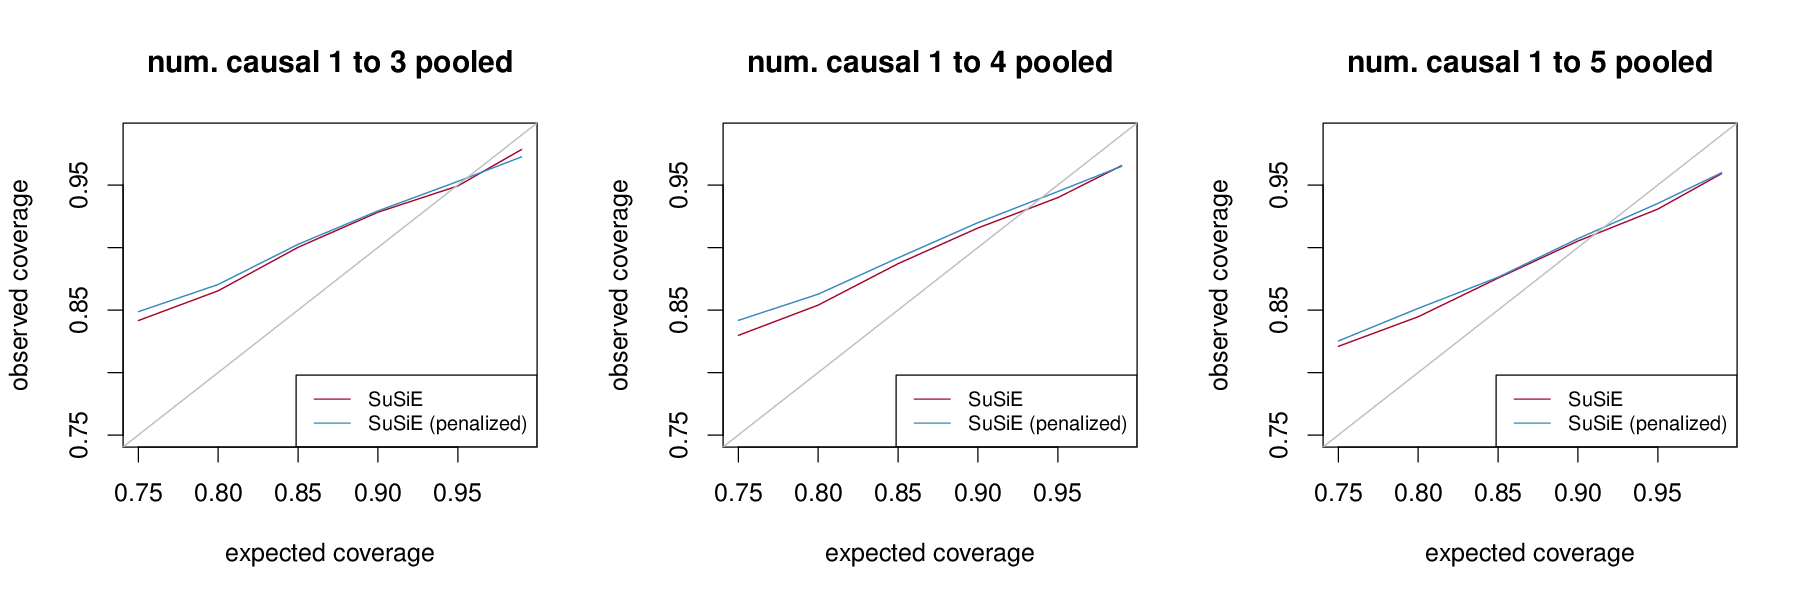

In [21]:
%preview susie_comparison/Coverage_1008_prior_0p1.png

## Speed comparison

### Command

```
sos run analysis/20180630_Runtime.ipynb speed
```

### Result

Note: this result is based on runs in a cluster environment -- each job is submitted to a cluster node at random with different hardware configurations, thus difficult to describe the setup. In the manuscript we published result from a single desktop machine running a partial benchmark, with a description of the machine's exact hardware setup.

In [22]:
dat = readRDS('susie_comparison/speed_comparison_1008_prior_0p1_null_0p0.rds')
t(apply(dat, 2, function(x) c(mean(x), min(x), max(x))))

SuSiE,0.63550,0.34050,2.275000
DAP,2.86735,2.22586,8.874461
FINEMAP,23.01671,10.99400,48.163000
CAVIAR,2907.50967,2637.33900,3018.519000


%preview susie_comparison/speed_comparison_1008_prior_0p1_null_0p0.png

> susie_comparison/speed_comparison_1008_prior_0p1_null_0p0.png (4.7 KiB):

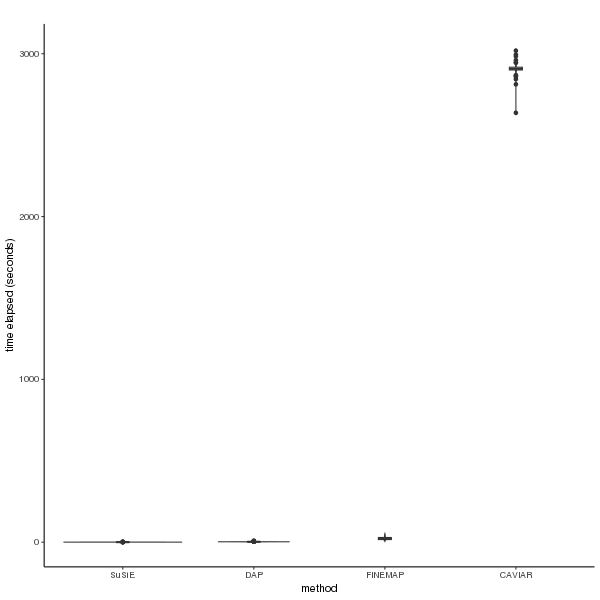

In [23]:
%preview susie_comparison/speed_comparison_1008_prior_0p1_null_0p0.png